В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

medical_df = pd.read_csv('data/medical-charges.csv')
non_smoker_df = medical_df[medical_df.smoker == 'no']

# Метод МНК

In [2]:
# Формуємо матрицю-стовпець незалежних змінних (масив з єдиною характеристикою age)
X = np.array(non_smoker_df[non_smoker_df.columns[:1]])
X

array([[18],
       [28],
       [33],
       ...,
       [18],
       [18],
       [21]], dtype=int64)

In [3]:
# Формуємо масив значень залежної змінної (charges)
# y = np.array(non_smoker_df[non_smoker_df.columns[6:]])
y = np.array(non_smoker_df.charges)
y

array([ 1725.5523 ,  4449.462  , 21984.47061, ...,  2205.9808 ,
        1629.8335 ,  2007.945  ])

In [4]:
# Додаємо стовпець одиничок, щоб отримати константу в моделі регресії
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]
X_with_intercept

array([[ 1., 18.],
       [ 1., 28.],
       [ 1., 33.],
       ...,
       [ 1., 18.],
       [ 1., 18.],
       [ 1., 21.]])

In [5]:
# Створюємо функцію для визначення коефіцієнтів лінійної регресії
def normal_equations(X, y):
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [6]:
# Обчислюємо коефіцієнти лінійної регресії
MNK_coefs = normal_equations(X_with_intercept, y)
MNK_coefs

array([-2091.42055657,   267.24891283])

In [7]:
# Обчислюємо прогноз моделі за знайденими коефіцієнтами
predictions_MNK = np.dot(X_with_intercept, MNK_coefs)
predictions_MNK

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [8]:
# Рахуємо точність прогнозу RMSE
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

targets = y
predictions = predictions_MNK

rmse_MNK = rmse(targets, predictions)
rmse_MNK

4662.505766636395

# Full-Batch градієнтний спуск

In [9]:
# Задаємо функцію градієнтного спуску
def full_batch_gradient_descent(X, y, lr = 0.05, epochs = 100):
    m, b = 0.0, 0.0 # початкові значення
    n = len(y) # величина набору
    errors = []
    for _ in range(epochs):
        y_pred = m * X[:, 0] + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X[:, 0])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

In [10]:
# Обчислюємо коефіцієнти лінійної регресії при learning rate = 0.001
m1, b1, errors1 = full_batch_gradient_descent(X, y, lr = 0.001, epochs = 1000)
m1, b1

C:\Users\Admin\anaconda3\envs\py375\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in double_scalars
  if __name__ == "__main__":
C:\Users\Admin\anaconda3\envs\py375\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in square
  if __name__ == "__main__":
C:\Users\Admin\anaconda3\envs\py375\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == "":


(nan, nan)

Отримана помилка "overflow" – модель не здатна розрахувати коефіцієнти при заданому learning rate. 

In [11]:
# Обчислюємо коефіцієнти лінійної регресії при learning rate = 0.0005
m2, b2, errors2 = full_batch_gradient_descent(X, y, lr = 0.0005, epochs = 1000)
m2, b2

(225.1005806901033, -219.45815699658465)

Модель розрахувала коефіцієнти при learning rate = 0.0005, але коефіцієнт b сильно відрізняється від того, що був знайдений вище методом МНК.\
Розрахуємо коефіцієнти при тому самому learning rate, але збільшимо кількість ітерацій (щоб вона дійшла до кращого (відомого нам) значення).

In [12]:
# Обчислюємо коефіцієнти лінійної регресії при learning rate = 0.0005
m3, b3, errors3 = full_batch_gradient_descent(X, y, lr = 0.0005, epochs = 100000)
m3, b3

(267.24834166052585, -2091.395188775404)

In [13]:
# Обчислюємо прогноз моделі за знайденими коефіцієнтами
predictions_fbgd = m3 * X[:, 0] + b3
predictions_fbgd

array([2719.07496111, 5391.55837772, 6727.80008602, ..., 2719.07496111,
       2719.07496111, 3520.8199861 ])

In [14]:
# Рахуємо точність прогнозу RMSE
rmse_fbgd = rmse(y, predictions_fbgd)
rmse_fbgd

4662.505766644212

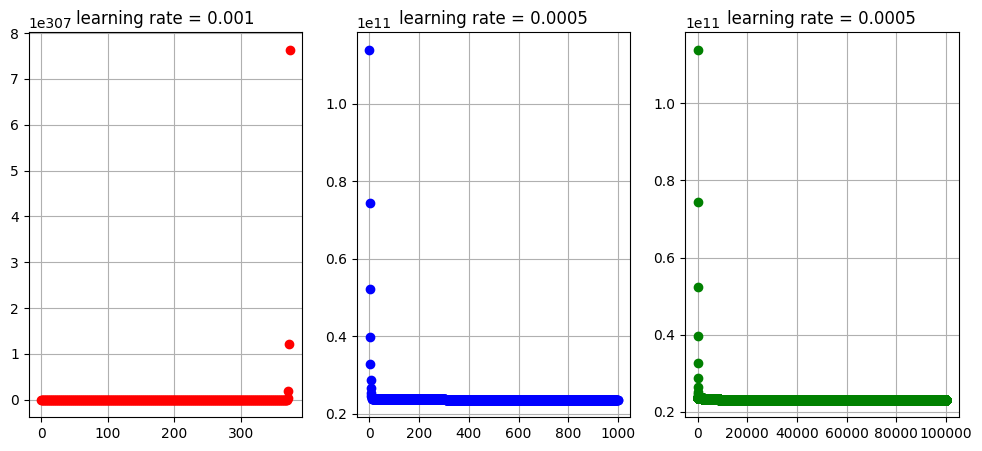

In [15]:
# Будуємо графік помилки в залежності від ітерації
plt.figure(figsize =(12,5))

plt.subplot(1,3,1)
plt.plot(errors1, 'o', color = 'red')
plt.title('learning rate = 0.001')
plt.grid(True)

plt.subplot(1,3,2)
plt.plot(errors2, 'o', color = 'blue')
plt.title('learning rate = 0.0005')
plt.grid(True)

plt.subplot(1,3,3)
plt.plot(errors3, 'o', color = 'green')
plt.title('learning rate = 0.0005')
plt.grid(True)

plt.show()

З графіків видно, що при learning rate = 0.001 при збільшенні кількості ітерацій помилки в якийсь момент замість зменшення починають прямувати вверх, а при learning rate = 0.0005 навпаки – при збільшенні кількості ітерацій величина помилки зменшується. 

# Scikit-learn.LinearRegression

In [16]:
# Модель лінійної регресії засобами Scikit-learn (МНК)
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [17]:
# Обчислюємо коефіцієнти лінійної регресії
lin_reg.coef_, lin_reg.intercept_

(array([267.24891283]), -2091.4205565650864)

In [18]:
# Обчислюємо прогноз моделі
predictions_sklearn = lin_reg.predict(X)
predictions_sklearn

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [19]:
# Рахуємо точність прогнозу RMSE
rmse_sklearn = rmse(y, predictions_sklearn)
rmse_sklearn

4662.505766636395

# Порівняння ліній регресії, знайдених різними методами

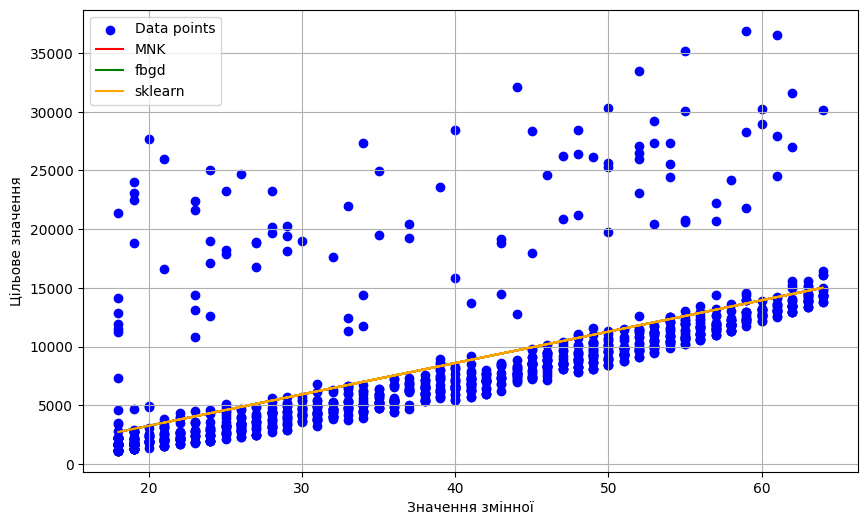

In [20]:
# Візуалізація результатів
plt.figure(figsize = (10, 6))
plt.scatter(X[:, 0], y, color = 'blue', label = 'Data points')
plt.plot(X[:, 0], predictions_MNK, color = 'red', label = 'MNK')
plt.plot(X[:, 0], predictions_fbgd, color = 'green', label = 'fbgd')
plt.plot(X[:, 0], predictions_sklearn, color = 'orange', label = 'sklearn')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
print('Коефіцієнти з МНК: ', MNK_coefs)
print('Коефіцієнти з full-batch град. спуску: ', b3, m3)
print('Коефіцієнти з sklearn: ', lin_reg.intercept_, lin_reg.coef_)

Коефіцієнти з МНК:  [-2091.42055657   267.24891283]
Коефіцієнти з full-batch град. спуску:  -2091.395188775404 267.24834166052585
Коефіцієнти з sklearn:  -2091.4205565650864 [267.24891283]


In [22]:
print('Прогноз з МНК: ', predictions_MNK)
print('Прогноз з full-batch град. спуску: ', predictions_fbgd)
print('Прогноз з sklearn: ', predictions_sklearn)

Прогноз з МНК:  [2719.0598744  5391.54900271 6727.79356686 ... 2719.0598744  2719.0598744
 3520.80661289]
Прогноз з full-batch град. спуску:  [2719.07496111 5391.55837772 6727.80008602 ... 2719.07496111 2719.07496111
 3520.8199861 ]
Прогноз з sklearn:  [2719.0598744  5391.54900271 6727.79356686 ... 2719.0598744  2719.0598744
 3520.80661289]


In [23]:
print('Точність прогнозу RMSE з МНК:', rmse_MNK)
print('Точність прогнозу RMSE з full-batch град. спуску:', rmse_fbgd)
print('Точність прогнозу RMSE з sklearn:', rmse_sklearn)

Точність прогнозу RMSE з МНК: 4662.505766636395
Точність прогнозу RMSE з full-batch град. спуску: 4662.505766644212
Точність прогнозу RMSE з sklearn: 4662.505766636395


**Висновок:** результати трьох моделей практично однакові – це видно з числових значень і з графіка (всі три лінії регресії співпадають). Значення коефіцієнтів схожі до тих, що раніше (в попередніх ДЗ) були знайдені методом підбору.

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [24]:
smoker_df = medical_df[medical_df.smoker == 'yes']

In [25]:
# Формуємо матрицю-стовпець незалежних змінних (масив з єдиною характеристикою age) і масив значень залежної змінної (charges)
X1 = np.array(smoker_df[smoker_df.columns[:1]])
y1 = np.array(smoker_df.charges)

In [26]:
lin_reg1 = LinearRegression()
lin_reg1.fit(X1, y1)

LinearRegression()

In [27]:
# Обчислюємо коефіцієнти лінійної регресії
lin_reg1.coef_, lin_reg1.intercept_

(array([305.23760211]), 20294.12812691597)

In [28]:
# Обчислюємо прогноз моделі
predictions_sklearn_1 = lin_reg1.predict(X1)

In [29]:
# Рахуємо точність прогнозу RMSE
rmse_sklearn_1 = rmse(y1, predictions_sklearn_1)
rmse_sklearn_1

10711.00334810241

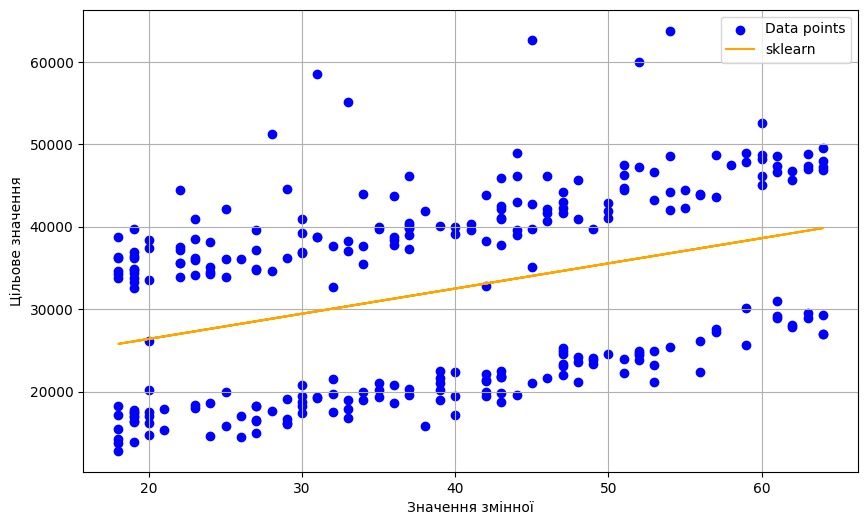

In [30]:
# Візуалізація результатів
plt.figure(figsize = (10, 6))
plt.scatter(X1[:, 0], y1, color = 'blue', label = 'Data points')
plt.plot(X1[:, 0], predictions_sklearn_1, color = 'orange', label = 'sklearn')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
# Оцінюємо якість моделі, обчисливши коефіцієнт детермінації R^2 (варіант 1)
def r_square(targets, predictions):
    return 1 - (np.sum(np.square(targets - predictions)) / np.sum(np.square(targets - np.mean(targets))))

targets = y1
predictions = predictions_sklearn_1

r_square(targets, predictions)

0.13558924096084068

**Висновок:** коефіцієнт детермінації R^2 близький до нуля, а значить модель погано апроксимована до реальних даних і її краще не використовувати в компанії.

In [32]:
# Оцінюємо якість моделі, порівнявши стандартне відхилення реальних значень з RMSE (варіант 2)
y1.std()

11520.46670652943

**Висновок:** оскільки величина розкиду таргетних значень майже така ж як RMSE (11520.46670652943 проти 10711.00334810241), значить модель погано описує реальні дані. 